# Carga de datos de Activos financieros (tablas de hechos)

Utilizando Investpy, librería de Python que obtiene los datos de investing.com sobre
https://investpy.readthedocs.io  and https://readthedocs.org/projects/investpy/downloads/pdf/latest/

Instalacion de la librería
$ python -m pip install investpy
$ conda install investpy
$ python -m pip install https://github.com/alvarobartt/investpy/archive/master.zip

Actualizacion de la librería
$ python -m pip install --upgrade investpy
$ conda update investpy
$ python -m pip install --upgrade https://github.com/alvarobartt/investpy/archive/master.zip

Los tipos de activos financieros de los que se pueden extraer datos "BÁSICOS" de cotizacion son:

- Investment Funds - Fondos de Inversion
- ETFs
- Indices bursatiles - IBEX35, ...
- Stocks - Acciones
- CURRENCY converter

investpy is a Python package developed in order to retrieve all the available historical data from stocks/stocks, funds and ETFs from Investing.com. As Investing.com does not have any API to retrieve historical data, the main goal of this package is to allow users retrieve information from all the available financial products.

investpy came to life due to the need of covering the existing shortcomings in terms of real time data retrieval from stocks of the companies that make up the Spanish Stock Market, until the date there was no other package that provided a data extraction model for stocks from the Spanish Stock Market.




In [1]:
#!python -m pip install --upgrade https://github.com/alvarobartt/investpy/archive/master.zip
import investpy
import pandas

#Liberías para gráficos plot()
# importar todas las funciones de pylab
from pylab import *
# importar el módulo pyplot
import matplotlib.pyplot as plt


     | 4.5 MB 3.1 MB/s
  Created wheel for investpy: filename=investpy-1.1.0-py3-none-any.whl size=4466940 sha256=a4ab599f93dc27e453ac51f2be8221fa74b9413a612248d5d4dc482af666cde8
  Stored in directory: /private/var/folders/bj/kfs5d7tn5pscm2dkttwq2g3c0000gn/T/pip-ephem-wheel-cache-g_ak0aib/wheels/3e/4e/56/e362929457713d1b6563d2d21ecd9618b12b0e00e445c26615
Successfully built investpy
  Attempting uninstall: investpy
    Found existing installation: investpy 1.0
    Uninstalling investpy-1.0:
      Successfully uninstalled investpy-1.0
You should consider upgrading via the '/Users/angelalvarez/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


# Carga de Fondos de Inversion

A continuación, cargamos los datos básicos de fondos de inversión y los almacenamos en ficheros


In [4]:
# Ultimos datos de un fondo de inversion específico, recupera los últimos 16 registros mas recientes
df = investpy.get_fund_recent_data(fund='bbva plan multiactivo moderado pp',
                                   country='spain')
print(df)

             Open   High    Low  Close Currency
Date                                           
2020-12-28  1.111  1.111  1.111  1.111      EUR
2020-12-29  1.114  1.114  1.114  1.114      EUR
2020-12-30  1.115  1.115  1.115  1.115      EUR
2021-01-04  1.116  1.116  1.116  1.116      EUR
2021-01-07  1.128  1.128  1.128  1.128      EUR
2021-01-08  1.131  1.131  1.131  1.131      EUR
2021-01-11  1.131  1.131  1.131  1.131      EUR
2021-01-12  1.129  1.129  1.129  1.129      EUR
2021-01-13  1.132  1.132  1.132  1.132      EUR
2021-01-14  1.133  1.133  1.133  1.133      EUR
2021-01-15  1.130  1.130  1.130  1.130      EUR
2021-01-18  1.129  1.129  1.129  1.129      EUR
2021-01-19  1.131  1.131  1.131  1.131      EUR
2021-01-20  1.139  1.139  1.139  1.139      EUR
2021-01-21  1.139  1.139  1.139  1.139      EUR
2021-01-22  1.136  1.136  1.136  1.136      EUR


In [5]:
# Recupera los registros de un periodo de tiempo especificado
df = investpy.get_fund_historical_data(fund='bbva plan multiactivo moderado pp',
                                       country='spain',
                                       from_date='01/01/2010',
                                       to_date='01/01/2019')
print(df.head())

             Open   High    Low  Close Currency
Date                                           
2018-02-15  1.105  1.105  1.105  1.105      EUR
2018-02-16  1.113  1.113  1.113  1.113      EUR
2018-02-17  1.113  1.113  1.113  1.113      EUR
2018-02-18  1.113  1.113  1.113  1.113      EUR
2018-02-19  1.111  1.111  1.111  1.111      EUR


In [6]:
# Recupera información basica de las características de un Fondo de inversion

fund_information = investpy.get_fund_information(fund='bbva plan multiactivo moderado pp',
                                                 country='spain',
                                                 as_json=True)
print(fund_information)

{'Fund Name': 'bbva plan multiactivo moderado pp', 'Rating': '', '1-Year Change': '- 2.55%', 'Previous Close': nan, 'Risk Rating': '', 'TTM Yield': '0%', 'ROE': '14.02%', 'Issuer': nan, 'Turnover': None, 'ROA': '4.97%', 'Inception Date': '16/10/2012', 'Total Assets': 1950000000.0, 'Expenses': None, 'Min Investment': nan, 'Market Cap': 34820000000.0, 'Category': nan}


In [17]:
# Retrieve all available funds information as a pandas.DataFrame
funds_df = investpy.get_funds(country="Spain")
# Retrieve a listing of all the available fund names
funds_list = investpy.get_funds_list(country="Spain")
# Retrieve a dictionary with all the funds and all of their information fields
funds_dict = investpy.get_funds_dict(country="Spain")

In [16]:
len(funds_list)

4107

In [12]:
funds_list

['Ubs Mixto Gestión Activa I Fi',
 'Abante Valor Fi',
 'Bankinter Multiselección Conservador Fi',
 'Ing Direct Fondo Naranja Conservador Fi',
 'Ubs Mixto Gestión Activa P Fi',
 'Fonengin Isr, Fi',
 'Fondmapfre Elección Prudente Fi',
 'Rural Mixto Internacional 25 Fi',
 'Ubs Retorno Activo P Fi',
 'Rfmi Multigestión Fi',
 'Ibercaja Megatrends A Fi',
 'Bnp Paribas Flexible Max 30 A Fi',
 'Ibercaja Megatrends B Fi',
 'Arquiuno Prudente 30rv B Fi',
 'Welzia Ahorro 5 Fi',
 'ábaco Renta Fija Mixta Global R Fi',
 'Gestión Multiperfil Inversión Fi',
 'Deutsche Wealth Conservador A Fi',
 'Ca Selección Estrategia 20 Fi',
 'Deutsche Wealth Conservador B Fi',
 'ábaco Renta Fija Mixta Global I Fi',
 'Mutuafondo Mixto Selección A Fi',
 'Pbp Cartera Activa 30 A Fi',
 'Ibercaja Sostenible Y Solidario Fi',
 'Arquiuno Prudente 30rv A Fi',
 'Gescooperativo Gestión Moderado Fi',
 'Fondo Artac Fi',
 'Rural Mixto Internacional 15 Fi',
 'Inversabadell 10 Pyme Fi',
 'Sabadell Prudente Base Fi',
 'Inversabadel

In [20]:
funds_df

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,spain,Ubs Mixto Gestión Activa I Fi,158316036,UBS Gestión SGIIC,ES0158316036,equity,EUR,None
1,spain,Abante Valor Fi,190052037,Abante Asesores Gestión SGIIC,ES0190052037,equity,EUR,None
2,spain,Bankinter Multiselección Conservador Fi,180959035,Bankinter Gestión de Activos SGIIC,ES0180959035,equity,EUR,None
3,spain,Ing Direct Fondo Naranja Conservador Fi,152747004,Amundi Iberia SGIIC,ES0152747004,equity,EUR,None
4,spain,Ubs Mixto Gestión Activa P Fi,158316002,UBS Gestión SGIIC,ES0158316002,equity,EUR,None
...,...,...,...,...,...,...,...,...
4102,spain,"Amesapa, Sicav, S.a.",0P0000ITCI,Fineco Patrimonios SGIIC,ES0109201030,equity,EUR,None
4103,spain,"Cartebanc, Sicav S.a.",0P0000IT3R,Credit Suisse Gestión SGIIC,ES0116473036,equity,EUR,None
4104,spain,Natbry Inversiones Sicav S.a.,0P0000Z06G,UBS Gestión SGIIC,ES0165488000,equity,EUR,None
4105,spain,"Teyamar Investments Xxi Sicav, Sa",0P0000IT70,DUX Inversores SGIIC,ES0179051034,equity,EUR,None


In [21]:
funds_dict

[{'country': 'spain',
  'name': 'Ubs Mixto Gestión Activa I Fi',
  'symbol': '158316036',
  'issuer': 'UBS Gestión SGIIC',
  'isin': 'ES0158316036',
  'asset_class': 'equity',
  'currency': 'EUR',
  'underlying': None},
 {'country': 'spain',
  'name': 'Abante Valor Fi',
  'symbol': '190052037',
  'issuer': 'Abante Asesores Gestión SGIIC',
  'isin': 'ES0190052037',
  'asset_class': 'equity',
  'currency': 'EUR',
  'underlying': None},
 {'country': 'spain',
  'name': 'Bankinter Multiselección Conservador Fi',
  'symbol': '180959035',
  'issuer': 'Bankinter Gestión de Activos SGIIC',
  'isin': 'ES0180959035',
  'asset_class': 'equity',
  'currency': 'EUR',
  'underlying': None},
 {'country': 'spain',
  'name': 'Ing Direct Fondo Naranja Conservador Fi',
  'symbol': '152747004',
  'issuer': 'Amundi Iberia SGIIC',
  'isin': 'ES0152747004',
  'asset_class': 'equity',
  'currency': 'EUR',
  'underlying': None},
 {'country': 'spain',
  'name': 'Ubs Mixto Gestión Activa P Fi',
  'symbol': '15831

In [22]:
countries = investpy.get_fund_countries()

# Check if a country is either or not in the list & then get all the available funds from that country
if 'spain' in countries:
    funds = investpy.get_funds_list(country='spain')

In [30]:

search_result = investpy.search_funds(by='name', value='bbva')

# Get both name and country via pandas.DataFrame index
index = 0
name = search_result.loc[index, 'name']
country = search_result.loc[index, 'country']


# Or get it manually via printing the resulting pandas.DataFrame
print(search_result)


        country                                               name  \
0    luxembourg    Bbva Durbana International Fund Bbva Bitacora A   
1    luxembourg                     Bbva Dif European Equity P Eur   
2    luxembourg  Bbva Durbana International Fund Bbva European ...   
3    luxembourg                     Bbva Dif European Equity P Usd   
4        mexico        Fondo Bbva Bancomer Rv5 Sa De Cv S.i.r.v. E   
..          ...                                                ...   
648       spain                       Bbva Bolsa Usa (cubierto) Fi   
649       spain                         Bbva Mi Inversión Bolsa Fi   
650       spain                Bbva Bolsa Plan Dividendo Europa Fi   
651       spain             Bbva Mi Inversión Bolsa Acumulación Fi   
652       spain                 Bbva Catalana Cartera, Sicav, S.a.   

         symbol                          issuer          isin asset_class  \
0    0P0000RUZV     BBVA Asset Management SGIIC  LU0551332983      equity   
1    

In [31]:
# Get both name and country via unique field such as isin

search_result = investpy.search_funds(by='name', value='bbva')

isin = 'ES0113211835'
name = search_result.loc[(search_result['isin'].str == isin).idxmax(), 'name']
country = search_result.loc[(search_result['isin'].str == isin).idxmax(), 'country']



AttributeError: 'bool' object has no attribute 'idxmax'

In [33]:
# Retrieves last month's data of 'Bankia Cauto Pp', which is a fund from 'Spain', as a pandas.DataFrame
df = investpy.get_fund_recent_data(fund='Bankia Cauto Pp', country='spain')


In [34]:

# Retrieves historical data of 'Bankia Cauto Pp', which is a fund from 'Spain', on the specified date range as a pandas.DataFrame
df_hist = investpy.get_fund_historical_data(fund='Bankia Cauto Pp', country='spain', from_date='01/01/2018', to_date='01/01/2019')

In [36]:
df.head()

,Open,High,Low,Close,Currency
Date,,,,,
2020-12-26,119.223,119.223,119.223,119.223,EUR
2020-12-27,119.220,119.220,119.220,119.220,EUR
2020-12-28,119.359,119.359,119.359,119.359,EUR
2020-12-29,119.364,119.364,119.364,119.364,EUR
2020-12-30,119.310,119.310,119.310,119.310,EUR


In [37]:
df_hist.head(4)

,Open,High,Low,Close,Currency
Date,,,,,
2018-02-15,119.234,119.234,119.234,119.234,EUR
2018-02-16,119.436,119.436,119.436,119.436,EUR
2018-02-17,119.435,119.435,119.435,119.435,EUR
2018-02-18,119.435,119.435,119.435,119.435,EUR


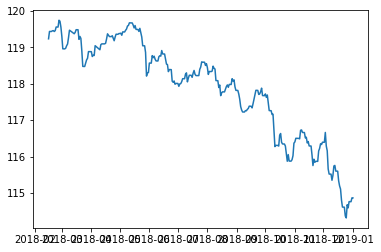

In [41]:
plot(df_hist.Open)
show()

## Informacion del fondo

presentar información básica del fondo de inversión


In [42]:
# Retrieve information from the introduced fund in the specified country
data = investpy.get_fund_information(fund='Bankia Cauto Pp', country='spain')

In [43]:
data


,Fund Name,Rating,1-Year Change,Previous Close,Risk Rating,TTM Yield,ROE,Issuer,Turnover,ROA,Inception Date,Total Assets,Expenses,Min Investment,Market Cap,Category
0,bankia cauto pp,,- 0.38%,NaN,,0%,14.79%,NaN,None,3.87%,15/10/2002,2.020000e+09,None,NaN,3.768000e+10,NaN


# Libreria trendet (usada con investpy)

https://github.com/alvarobartt/trendet


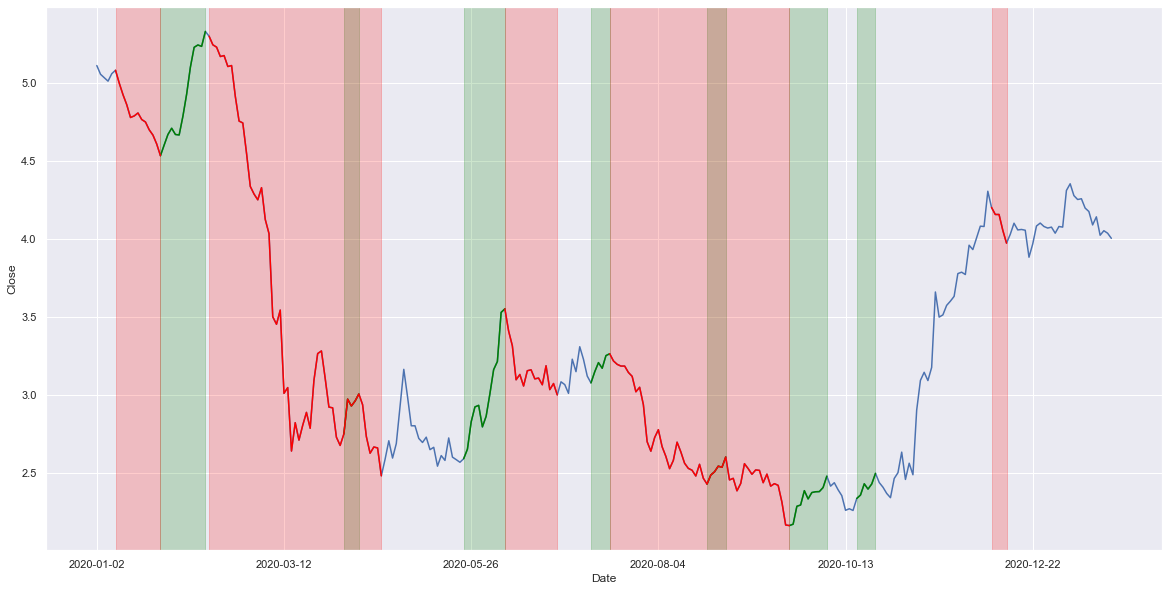

In [1]:
#!python -m pip install trendet --upgrade
import trendet

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

df = trendet.identify_all_trends(stock='BBVA',
                                 country='Spain',
                                 from_date='01/01/2020',
                                 to_date='24/01/2021',
                                 window_size=5,
                                 identify='both')

df.reset_index(inplace=True)

plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=df.index, y=df['Close'])
ax.set(xlabel='Date')

labels = df['Up Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Up Trend'] == label].index,
                 y=df[df['Up Trend'] == label]['Close'],
                 color='green')

    ax.axvspan(df[df['Up Trend'] == label].index[0],
               df[df['Up Trend'] == label].index[-1],
               alpha=0.2,
               color='green')

labels = df['Down Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=df[df['Down Trend'] == label].index,
                 y=df[df['Down Trend'] == label]['Close'],
                 color='red')

    ax.axvspan(df[df['Down Trend'] == label].index[0],
               df[df['Down Trend'] == label].index[-1],
               alpha=0.2,
               color='red')
               
locs, _ = plt.xticks()
labels = []

for position in locs[1:-1]:
    labels.append(str(df['Date'].loc[position])[:-9])

plt.xticks(locs[1:-1], labels)
plt.show()

In [78]:
# ejemplo gráfico con 2 lineas
from math import *
from numpy import *

t = arange(0.1, 20, 0.1)

# Retrieves historical data of 'Bankia Cauto Pp', which is a fund from 'Spain', on the specified date range as a pandas.DataFrame
df_hist1 = investpy.get_fund_historical_data(fund='Rural Mixto Internacional 25 Fi', country='spain', from_date='01/01/2019', to_date='24/01/2021')

# Retrieves historical data of 'Bankia Cauto Pp', which is a fund from 'Spain', on the specified date range as a pandas.DataFrame
df_hist2 = investpy.get_fund_historical_data(fund='Bbva Bolsa Usa (cubierto) Fi', country='spain', from_date='01/01/2019', to_date='24/01/2021')

# Retrieves historical data of 'Bankia Cauto Pp', which is a fund from 'Spain', on the specified date range as a pandas.DataFrame
df_hist3 = investpy.get_fund_historical_data(fund='Arquiuno Prudente 30rv B Fi', country='spain', from_date='01/01/2019', to_date='24/01/2021')




print('Bankia Cauto Pp', len(df_hist1),'Bbva Bolsa Usa (cubierto) Fi', len(df_hist2))
print('Arquiuno Prudente 30rv B Fi', len(df_hist3))




Bankia Cauto Pp 523 Bbva Bolsa Usa (cubierto) Fi 530
Arquiuno Prudente 30rv B Fi 692


In [71]:
df_hist3.head()


,Open,High,Low,Close,Currency
Date,,,,,
2019-01-01,10.225,10.225,10.225,10.225,EUR
2019-01-02,10.214,10.214,10.214,10.214,EUR
2019-01-03,10.167,10.167,10.167,10.167,EUR
2019-01-04,10.212,10.212,10.212,10.212,EUR
2019-01-05,10.212,10.212,10.212,10.212,EUR


In [67]:
str(df_hist1)

'              Open    High     Low   Close Currency\nDate                                               \n2019-01-02  851.26  851.26  851.26  851.26      EUR\n2019-01-03  845.75  845.75  845.75  845.75      EUR\n2019-01-04  851.51  851.51  851.51  851.51      EUR\n2019-01-05  851.50  851.50  851.50  851.50      EUR\n2019-01-06  851.50  851.50  851.50  851.50      EUR\n...            ...     ...     ...     ...      ...\n2019-12-24  911.80  911.80  911.80  911.80      EUR\n2019-12-26  911.78  911.78  911.78  911.78      EUR\n2019-12-27  910.71  910.71  910.71  910.71      EUR\n2019-12-30  908.47  908.47  908.47  908.47      EUR\n2019-12-31  908.26  908.26  908.26  908.26      EUR\n\n[256 rows x 5 columns]'

<ipython-input-89-8bf93dc289c5>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


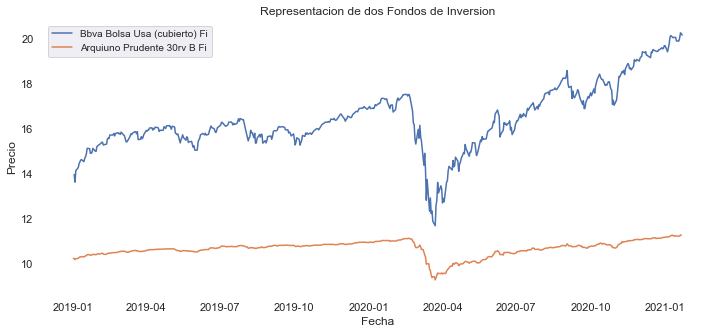

In [89]:

import matplotlib.pyplot as plt 
  
  
  

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(12, 5))

#plot(df_hist1.Open)
plt.plot(df_hist2.Open)
plt.plot(df_hist3.Open)
ax = plt.axes() 
# Setting the background color of the plot  
# using set_facecolor() method 
ax.set_facecolor("white") 



# Texto en la gráfica en coordenadas (x,y)
#texto1 = text(2, 0.6, r'$\frac{\sin(x)}{x}$', fontsize=20)
#texto2 = text(13, 0.2, r'$\sin(x) \cdot e^{-x}$', fontsize=16)

# Añado una malla al gráfico
grid()

# Añado leyenda, tamaño de letra 10, en esquina superior derecha
legend(('Bbva Bolsa Usa (cubierto) Fi', 'Arquiuno Prudente 30rv B Fi'),
prop = {'size': 10}, loc='upper left')


box()

title('Representacion de dos Fondos de Inversion')
xlabel('Fecha')
ylabel('Precio')



show()

In [90]:
from flask import Flask 
app = Flask(__name__) 
  
@app.route('/blog/<postID>') 
def show_blog(postID): 
   return 'Blog Number %d' % postID 
  
@app.route('/rev/<revNo>') 
def revision(revNo): 
   return 'Revision Number %f' % revNo 
  
if __name__ == '__main__': 
   app.run() 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Jan/2021 02:14:29] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [27/Jan/2021 02:14:29] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [27/Jan/2021 02:14:57] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [27/Jan/2021 02:14:57] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [27/Jan/2021 02:15:18] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [27/Jan/2021 02:15:18] "GET /favicon.ico HTTP/1.1" 404 -
[2021-01-27 02:16:02,594] ERROR in app: Exception on /rev/<revNo> [GET]
Traceback (most recent call last):
  File "/Users/angelalvarez/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/angelalvarez/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/angelalvarez/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_ty

In [ ]:
from wsgiref.simple_server import make_server

def application(environ, start_response):
    headers = [('Content-type', 'text/plain; charset=utf-8')]

    start_response('200 OK', headers)


    return ['Hola gente de códigofacilito'.encode('utf-8')]

server = make_server('localhost', 8000, application)
server.serve_forever()

In [94]:
from wsgiref.simple_server import make_server

HTML = """
<!DOCTYPE html>
<html>
  <head>
    <title>Título</title>
  </head>
  <body>
    <h1>Hola gente de códigofacilito 3 </h1>
  </body>
</html>
"""

def application(environ, start_response):
    headers = [ ('Content-type', 'text/html; charset=utf-8') ]

    start_response('200 OK', headers)

    return [bytes(HTML, 'utf-8')]

server = make_server('localhost', 8001, application)
server.serve_forever()


127.0.0.1 - - [27/Jan/2021 02:26:26] "GET / HTTP/1.1" 200 143
127.0.0.1 - - [27/Jan/2021 02:26:26] "GET /favicon.ico HTTP/1.1" 200 143


KeyboardInterrupt: 

In [ ]:
from jinja2 import FileSystemLoader, Environment
from wsgiref.simple_server import make_server

def application(environ, start_response):
    env = Environment(loader=FileSystemLoader("templates"))
    template = env.get_template('template.html')

    data = {
        'title': 'WSGI tutorial',
        'username': 'Codi'
    }

    html = template.render(data)

    headers = [ ('Content-type', 'text/html; charset=utf-8') ]

    start_response('200 OK', headers)

    return [bytes(html, 'utf-8')]

server = make_server('localhost', 8002, application)
server.serve_forever()